## Random Forest Regression

## Download dataset

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Goal

To estimate whether client subscribe term deposit or not

## Python imports

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid',color_codes=True)

## Read the Datasets

In [52]:
datasets = pd.read_csv('bank_data.csv', header=0)

In [53]:
datasets

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [54]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no


In [55]:
data.shape

(45210, 17)

In [58]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

## Barplot for the dependant variables

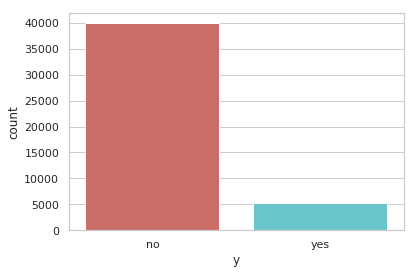

In [62]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()

## Null values

In [67]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 1 to 45210
Data columns (total 17 columns):
age          45210 non-null int64
job          45210 non-null object
marital      45210 non-null object
education    45210 non-null object
default      45210 non-null object
balance      45210 non-null int64
housing      45210 non-null object
loan         45210 non-null object
contact      45210 non-null object
day          45210 non-null int64
month        45210 non-null object
duration     45210 non-null int64
campaign     45210 non-null int64
pdays        45210 non-null int64
previous     45210 non-null int64
poutcome     45210 non-null object
y            45210 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## JOB distribution

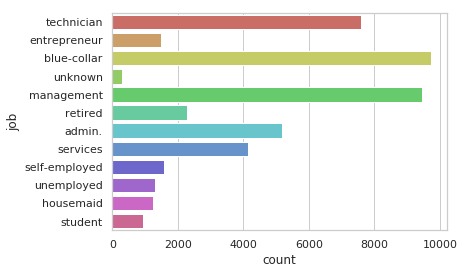

In [72]:
sns.countplot(y='job', data=data, palette='hls'
             )
plt.show()

## marital status distribution

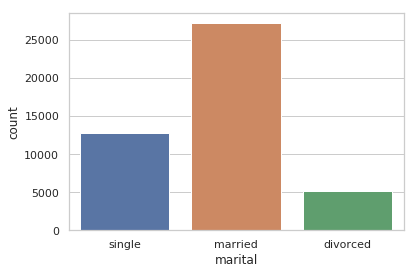

In [74]:
sns.countplot(x='marital',data=data)
plt.show()